# Predicting the house price: Data Exploration.

In this notebook I perform some preliminary analysis on the provided data, with the idea of obtaining some insight regarding the variables incidence on the predicted target, finding correlations, etc.

The main insight I am planning to get is correlation between values of non numerical categorical variables and target. This is because creating dummy variables would generate a dataset of many hundreds of variables, and encoding variables into ordinal numbers would be preferable.

For a description of the variables, see documentation on the kaggle page of the dataaset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
php_data= pd.read_csv('data/train.csv')
feat = pd.read_csv('data/Features_xy.csv')
Neighborhood = pd.read_csv('data/Neighborhood.coordinates.csv')

In [3]:
feat.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Gar2,Othr,Shed,New,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,60,6,65.0,8450,2,0,0,0,0,...,0,0,0,0.0,0,0,0,0,1,0
1,1,20,6,80.0,9600,2,0,0,0,0,...,0,0,0,0.0,0,0,0,0,1,0
2,2,60,6,68.0,11250,2,0,1,0,0,...,0,0,0,0.0,0,0,0,0,1,0
3,3,70,6,60.0,9550,2,0,1,0,0,...,0,0,0,0.0,1,0,0,0,0,0
4,4,60,6,84.0,14260,2,0,1,0,0,...,0,0,0,0.0,0,0,0,0,1,0


In [4]:
data=php_data.copy()
data=data.drop('Id',axis=1)

###  Exterior covering on house

In [5]:
sub_df = data[['Exterior1st','SalePrice']]
sub_df = sub_df.groupby(['Exterior1st']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
Exterior1st,
BrkComm,71000.000000
AsphShn,100000.000000
AsbShng,104870.076923
Stucco,144808.823529
Wd Sdng,147842.802721
MetalSd,148872.053333
HdBoard,160987.350318
WdShing,161562.210526
Plywood,174681.456790


### Roof material

In [6]:
sub_df = data[['RoofMatl','SalePrice']]
sub_df = sub_df.groupby(['RoofMatl']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
RoofMatl,
Tar&Grv,176450.000000
Metal,180000.000000
CompShg,180427.018981
WdShake,220000.000000
Membran,241500.000000
WdShngl,412700.000000


### Roof style

In [7]:
sub_df = data[['RoofStyle','SalePrice']]
sub_df = sub_df.groupby(['RoofStyle']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
RoofStyle,
Gambrel,140687.500000
Gable,173001.872659
Mansard,187496.500000
Flat,188000.000000
Hip,218742.097938


### House Style

In [8]:
sub_df = data[['HouseStyle','SalePrice']]
sub_df = sub_df.groupby(['HouseStyle']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
HouseStyle,
1.5Unf,107175.000000
SFoyer,138472.961538
1.5Fin,140743.841584
SLvl,164465.476190
2.5Unf,166925.000000
1Story,175922.757339
2Story,212393.466667
2.5Fin,228666.666667


### Masonry veneer type

In [9]:
sub_df = data[['MasVnrType','SalePrice']]
sub_df = sub_df.groupby(['MasVnrType']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
MasVnrType,
BrkCmn,140397.583333
None,156107.704698
BrkFace,206473.323171
Stone,276947.582278


### Type of Foundation

In [10]:
sub_df = data[['Foundation','SalePrice']]
sub_df = sub_df.groupby(['Foundation']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
Foundation,
Slab,111198.333333
BrkTil,132392.673267
Wood,143000.000000
CBlock,149979.772523
Stone,155438.750000
PConc,226143.721491


### Type of heating

In [11]:
sub_df = data[['Heating','SalePrice']]
sub_df = sub_df.groupby(['Heating']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
Heating,
Grav,68350.000000
Wall,92750.000000
GasW,167562.785714
GasA,182529.637363


### Electrical system

In [12]:
sub_df = data[['Electrical','SalePrice']]
sub_df = sub_df.groupby(['Electrical']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
Electrical,
Mix,67000.000000
FuseP,97333.333333
FuseF,109217.500000
FuseA,122005.632353
SBrkr,188027.139935


### Garage location

In [13]:
sub_df = data[['GarageType','SalePrice']]
sub_df = sub_df.groupby(['GarageType']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
GarageType,
CarPort,113983.333333
Detchd,134515.040441
2Types,138250.000000
Basment,165510.333333
Attchd,203121.320261
BuiltIn,265713.566667


### Paved driveway

In [14]:
sub_df = data[['PavedDrive','SalePrice']]
sub_df = sub_df.groupby(['PavedDrive']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
PavedDrive,
N,111253.774194
P,131931.818182
Y,187531.176094


### Fence quality

In [15]:
sub_df = data[['Fence','SalePrice']]
sub_df = sub_df.groupby(['Fence']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
Fence,
MnWw,134268.750000
GdWo,135866.194444
MnPrv,143709.366972
GdPrv,176525.609756


### Miscellaneous feature not covered in other categories

In [16]:
sub_df = data[['MiscFeature','SalePrice']]
sub_df = sub_df.groupby(['MiscFeature']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
MiscFeature,
Othr,94000.000
Shed,146916.075
Gar2,151500.000


In [17]:
sub_df = data[['MiscFeature','SalePrice']]
dummy = pd.get_dummies(sub_df['MiscFeature'])
dummy.head()

,Gar2,Othr,Shed
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


# Type of sale

In [18]:
sub_df = data[['SaleType','SalePrice']]
sub_df = sub_df.groupby(['SaleType']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
SaleType,
ConLD,133271.428571
COD,136272.580645
ConLw,143625.000000
Oth,150000.000000
WD,173461.063636
ConLI,200390.000000
CWD,243450.000000
Con,269600.000000
New,280464.157303


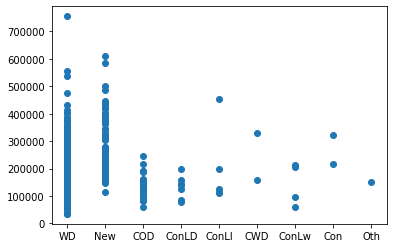

In [19]:
sub_df = data[['SaleType','SalePrice']]
x = sub_df.SaleType
y= sub_df.SalePrice
plt.scatter(x,y)

### Condition of sale

In [20]:
sub_df = data[['SaleCondition','SalePrice']]
sub_df = sub_df.groupby(['SaleCondition']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

,SalePrice
SaleCondition,
AdjLand,104125.000000
Abnorml,136484.100000
Family,145571.428571
Alloca,162460.000000
Normal,176279.626202
Partial,277135.274725


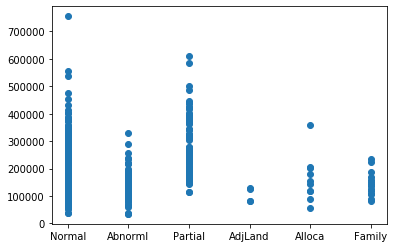

In [21]:
sub_df = data[['SaleCondition','SalePrice']]
x = sub_df.SaleCondition
y= sub_df.SalePrice
plt.scatter(x,y)

### Distance from centre

In [22]:
sub_df = feat[['Neighborhood','SalePrice']]
for ii in range(len(sub_df['Neighborhood'])):
    sub_df.loc[ii,'Lat']=float(Neighborhood[Neighborhood.Code==data.loc[ii]['Neighborhood']]['Latitude'])
    sub_df.loc[ii,'Lon']=float(Neighborhood[Neighborhood.Code==data.loc[ii]['Neighborhood']]['Longitude'])
sub_df = sub_df.groupby(['Neighborhood']).mean()
sub_df=sub_df.sort_values(by=['SalePrice'])
sub_df

C:\Users\Raffaele\Anaconda3\envs\py3_TF2\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Raffaele\Anaconda3\envs\py3_TF2\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SalePrice,Lat,Lon
Neighborhood,,,
MeadowV,94990.909091,42.026770,-93.617055
IDOTRR,99423.448276,42.022753,-93.622259
BrDale,102890.000000,42.052547,-93.628226
BrkSide,123731.097561,42.026770,-93.617055
Edwards,128632.835821,42.015945,-93.685633
OldTown,129708.135802,43.313575,-95.144162
Blueste,137500.000000,42.011170,-93.645063
Sawyer,138620.232143,42.033924,-93.676648
SWISU,143988.933333,42.027910,-93.644644


In [23]:
import gmaps
api_key = open('google_api_key.txt','r').read()
gmaps.configure(api_key=api_key)

In [24]:
locations = sub_df[['Lat','Lon']]
heat = sub_df['SalePrice']
fig= gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations,weights = heat))
fig

Figure(layout=FigureLayout(height='420px'))

![Price heatmap](data/map.png)

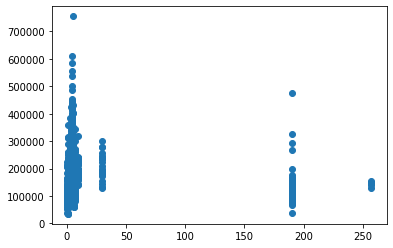

In [25]:
sub_df = feat[['Distance_from_centre','SalePrice']]
x = sub_df.Distance_from_centre
y= sub_df.SalePrice
plt.scatter(x,y)